In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle
import warnings
warnings.filterwarnings("ignore")

In [62]:
att = [24,26,87,67,59,91,79,83,45,96,92,38,49]
marks  = [48,61,91,76,67,97,89,92,65,98,96,46,61]
classes = [0,0,1,1,0,1,1,1,1,1,1,0,0]

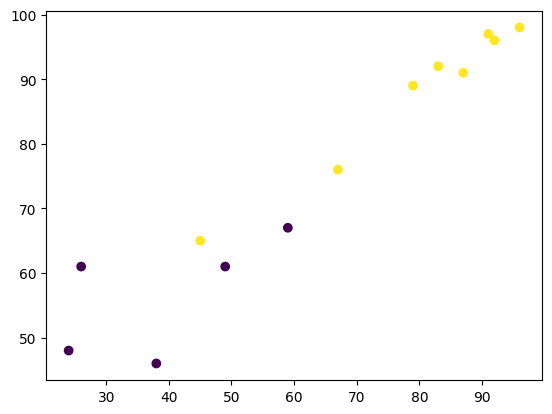

In [31]:
plt.scatter(att,marks,c = classes)
plt.show()

In [32]:
model = KNeighborsClassifier()

In [33]:
X = list(zip(att,marks))

In [34]:
model.fit(X,classes)

KNeighborsClassifier()

In [35]:
df = pd.read_csv("employee.csv")

In [36]:
df.isna().sum()

EmployeeID             37
Age                    37
Salary                 37
Experience (Years)     37
Department             37
Stays (1=Yes, 0=No)    37
dtype: int64

In [37]:
df.dropna(inplace=True)

In [38]:
df["Stays (1=Yes, 0=No)"].value_counts()

Stays (1=Yes, 0=No)
0.0    43
1.0     7
Name: count, dtype: int64

In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
df["Department"].unique()

array(['HR', 'Sales', 'IT'], dtype=object)

In [41]:
le = LabelEncoder()

In [42]:
df["Department"] = le.fit_transform(df["Department"])

In [43]:
df.head()

,EmployeeID,Age,Salary,Experience (Years),Department,"Stays (1=Yes, 0=No)"
0,1.0,25.0,30000.0,2.0,0,0.0
1,2.0,32.0,45000.0,5.0,2,0.0
2,3.0,28.0,35000.0,3.0,1,0.0
3,4.0,45.0,70000.0,15.0,2,0.0
4,5.0,30.0,40000.0,4.0,0,0.0


In [44]:
df.drop("EmployeeID",axis=1,inplace=True)

In [45]:
X = df.drop("Stays (1=Yes, 0=No)",axis = 1)
y = df["Stays (1=Yes, 0=No)"]

In [46]:
model = KNeighborsClassifier()

In [47]:
model.fit(X,y)

KNeighborsClassifier()

In [48]:
model.predict([[45.0,70000.0,15.0,2]])

array([0.])

In [49]:
with open("knn.pkl",'wb') as file:
    pickle.dump(model,file)

In [50]:
with open("knn.pkl",'rb') as file:
    model = pickle.load(file)

In [58]:
df = pd.read_csv("dataset.csv")

In [59]:
df.shape

(200, 2)

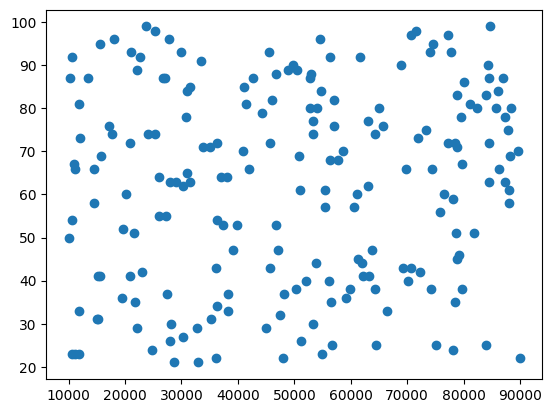

In [60]:
plt.scatter(df["income"],df["age"])
plt.show()

In [80]:
model = KMeans(n_clusters=4)

In [86]:
pred = model.fit_predict(df[["age","income"]])

In [87]:
pred

array([0, 2, 0, 2, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 1, 3, 2, 0, 3, 2, 0, 1,
       2, 1, 1, 3, 2, 0, 1, 0, 1, 0, 0, 1, 1, 2, 3, 3, 2, 3, 0, 3, 3, 2,
       2, 0, 0, 2, 2, 3, 2, 2, 1, 3, 3, 1, 3, 2, 0, 2, 3, 0, 3, 3, 0, 0,
       3, 0, 1, 3, 0, 2, 0, 1, 2, 3, 1, 3, 2, 0, 0, 3, 2, 3, 1, 3, 2, 2,
       1, 2, 3, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 3, 3, 0, 3, 2,
       2, 2, 3, 3, 3, 2, 3, 1, 1, 2, 0, 3, 3, 0, 2, 1, 0, 0, 2, 0, 2, 0,
       3, 3, 1, 0, 2, 1, 1, 0, 1, 3, 0, 1, 2, 0, 0, 3, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 0, 0, 1, 0, 2, 0, 1, 2, 2, 2, 3, 1, 0, 2, 1, 0, 2, 2, 1,
       2, 2, 0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 2, 0, 1, 2, 0, 3, 0, 1, 2, 2,
       0, 2], dtype=int32)

In [90]:
df["status"] = pred

In [91]:
df

,age,income,status
0,38,50358,0
1,84,86057,2
2,47,63757,0
3,63,84512,2
4,82,46122,0
...,...,...,...
195,41,15144,1
196,66,86286,2
197,56,75807,2
198,40,56059,0


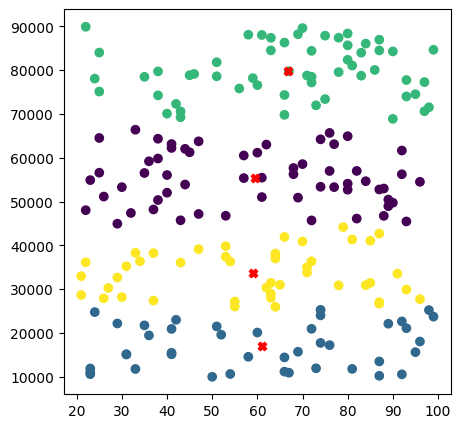

In [99]:
plt.figure(figsize=(5,5))
plt.scatter(df["age"],df["income"],c=df["status"])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color = "red",marker="X")
plt.show()

In [102]:
df = pd.read_csv("heart.csv")

In [104]:
df.shape

(1025, 14)

In [105]:
df.drop('target',axis=1,inplace=True)

In [109]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [114]:
model = PCA(0.5)

In [115]:
pred = model.fit_transform(df)

In [116]:
pred.shape

(1025, 1)